In [1]:
import csv
import random
import math
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA


<h1>SUPERVISED LEARNING (CLASSIFICATION)</h1>
Task : Mengklasifikasi dataset (kendaraan).

Langkah pertama yaitu meng-<i>input</i> dataset (kendaraaan_train.csv)

In [2]:
dataset = pd.read_csv('kendaraan_train.csv')
dataset.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


Periksa dataset apakah terdapat data NaN/Null/Kosong pada setiap rownya

In [3]:
dataset.isnull().values.any()

True

Karena terdapat data NaN pada dataset, maka data yang memiliki value NaN akan di-drop

In [4]:
dataset = dataset.dropna()

In [5]:
dataset.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
5,6,Pria,21.0,1.0,35.0,1.0,< 1 Tahun,Tidak,22735.0,152.0,171.0,0
8,9,Wanita,20.0,1.0,8.0,1.0,< 1 Tahun,Tidak,30786.0,160.0,31.0,0


In [6]:
dataset.dtypes

id                     int64
Jenis_Kelamin         object
Umur                 float64
SIM                  float64
Kode_Daerah          float64
Sudah_Asuransi       float64
Umur_Kendaraan        object
Kendaraan_Rusak       object
Premi                float64
Kanal_Penjualan      float64
Lama_Berlangganan    float64
Tertarik               int64
dtype: object

<h3>PREPROCESS</h3>

Karena tipe data Jenis_Kelamin, Umur_Kendaraan, dan Kendaraan_Rusak bertipe kategorikal, maka kolom-kolom tersebut dirubah ke tipe numerikal hal ini dilakukan agar setiap rownya bisa dihitung jaraknya terhadap centroid seperti yang ada pada algoritma k-nn

Merubah tipe data ini menggunakan fungsi LabelEncoder yang ada pada library sklearn

In [7]:
dataset['Jenis_Kelamin'] = LabelEncoder().fit_transform(dataset['Jenis_Kelamin'])
dataset['Umur_Kendaraan'] = LabelEncoder().fit_transform(dataset['Umur_Kendaraan'])
dataset['Kendaraan_Rusak'] = LabelEncoder().fit_transform(dataset['Kendaraan_Rusak'])

In [8]:
dataset.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,1,30.0,1.0,33.0,1.0,1,1,28029.0,152.0,97.0,0
1,2,0,48.0,1.0,39.0,0.0,2,0,25800.0,29.0,158.0,0
3,4,1,58.0,1.0,48.0,0.0,0,1,2630.0,124.0,63.0,0
5,6,0,21.0,1.0,35.0,1.0,1,1,22735.0,152.0,171.0,0
8,9,1,20.0,1.0,8.0,1.0,1,1,30786.0,160.0,31.0,0


Kolom id tidak digunakan, maka akan di-drop

In [9]:
dataset = dataset.drop(['id'], axis=1)

In [10]:
dataset.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,30.0,1.0,33.0,1.0,1,1,28029.0,152.0,97.0,0
1,0,48.0,1.0,39.0,0.0,2,0,25800.0,29.0,158.0,0
3,1,58.0,1.0,48.0,0.0,0,1,2630.0,124.0,63.0,0
5,0,21.0,1.0,35.0,1.0,1,1,22735.0,152.0,171.0,0
8,1,20.0,1.0,8.0,1.0,1,1,30786.0,160.0,31.0,0


<h3>SPLITTING DATA</h3>

Data train kemudian di-split ke dalam variabel X yang merupakan fitur-fitur dari dataset dan y yang merupakan label dataset (Tertarik)

In [11]:
y = dataset.Tertarik
X = dataset.drop(['Tertarik'], axis=1)

X dan y dipisahkan lagi menjadi data train dan data validasi. Komposisi data validasi adalah 20% dari dataset.
1. Data train adalah data yang digunakan untuk melatih model.
2. Data validasi adalah data yang digunakan untuk mengevaluasi model yang sudah dilatih, model tidak belajar dari data ini

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

<h3>OVERSAMPLING</h3>

Frekuensi data dengan label(Tertarik=1) sangat jauh lebih sedikit dibanding dengan label(Tertarik=0). Hal ini dinamakan imbalance dataset.

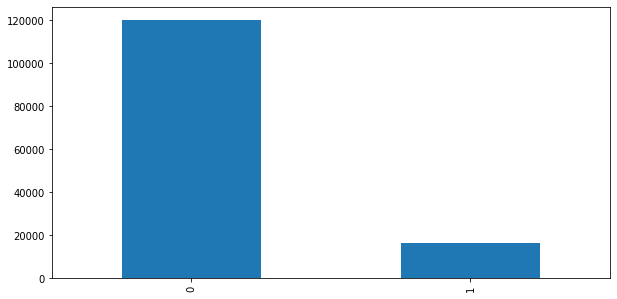

In [13]:
label_df = pd.DataFrame(data=y_train, columns=['Tertarik'])
fig, ax1 = plt.subplots(1, 1, figsize= (10, 5))
label_df.Tertarik.value_counts().plot(kind='bar', ax=ax1)
plt.show()

Untuk mengatasi imbalance dataset adalah menggunakan teknik oversampling, oversampling adalah teknik dengan membuat sample baru pada label minoritas sehingga komposisi setiap label seimbang.

Metode oversampling yang digunakan adalah Synthetic Minority Oversampling Technique (SMOTE). Cara kerjanya yaitu dengan memilih salah satu data pada kelas minoritas, kemudian k dari tetangga terdekat dipilih secara acak menjadi sample baru. Hal ini terus berulang sampai setiap kelas memiliki banyak yang sama.

In [14]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

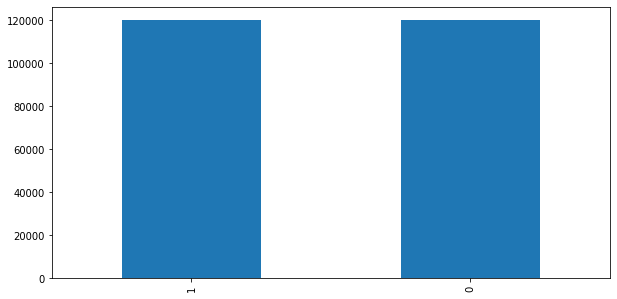

In [15]:
label_df = pd.DataFrame(data=y_train, columns=['Tertarik'])
fig, ax1 = plt.subplots(1, 1, figsize= (10, 5))
label_df.Tertarik.value_counts().plot(kind='bar', ax=ax1)
plt.show()

<h3>NORMALISASI DATA</h3>

Selanjutnya fitur-fitur (X) dinormalisasikan dengan menggunakan MinMaxScaler. 
Normalisasi ini berguna agar model dapat berlatih secara efisien dan efektif, karena beberapa model machine learning sekarang justru lebih baik belajar pada data yang sudah dinormalisasikan

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

<h3>MODEL KLASIFIKASI

Untuk mencari model terbaik maka dilakukan beberapa percobaaan menggunakan model klasifikasi berikut.
1. K Neighbors
2. Logistic Regression
3. Decision Tree
4. Random Forest
5. Naive Bayes

In [17]:
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
classifiers = [
    KNeighborsClassifier(5),
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB()
]

<h3>MODEL DILATIH</h3>

Setiap model dilatih menggunakan dataset yang sama, kemudian model-model tersebut dievaluasi menggunakan data validasi, hasil dari evaluasi tersebut adalah Mean Squared Error (MSE). Semakin kecil MSE, semakin bagus model bekerja pada dataset tersebut.

In [19]:
columns=["Classifier", "Accuracy", "MSE"]
log = pd.DataFrame(columns=columns)
target_names = list(dataset['Tertarik'].unique())
for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    print(name)
    train_predictions = clf.predict(X_valid)
    mse = mean_squared_error(y_valid, train_predictions)
    print("Mean Squared Error: X_valid",mse)
    log_entry = pd.DataFrame([[name, mse*100, mse]], columns=columns)
    log = log.append(log_entry)
    print('')

KNeighborsClassifier
Mean Squared Error: X_valid 0.22151750745308937

LogisticRegression
Mean Squared Error: X_valid 0.29297948208335767

DecisionTreeClassifier
Mean Squared Error: X_valid 0.17902028409423043

RandomForestClassifier
Mean Squared Error: X_valid 0.16265271526275793

GaussianNB
Mean Squared Error: X_valid 0.3611679429473315



<h3>VISUALISASI MSE</h3>

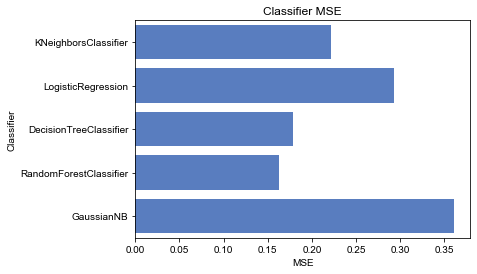

In [20]:
sns.set_color_codes("muted")
sns.barplot(x='MSE', y='Classifier', data=log, color="b")
sns.set(rc={'figure.figsize':(5,10)})
plt.xlabel('MSE')
plt.title('Classifier MSE')
plt.show()


Random Forest menjadi model klasifikasi terbaik untuk dataset ini.

Kemudian model Random Forest ini dilatih pada data train, kemudian selanjutnya akan memprediksi label pada data test

In [21]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
train_predictions = model.predict(X_valid)
acc = accuracy_score(y_valid, train_predictions)
mse = mean_squared_error(y_valid, train_predictions)
print("Akurasi: ",acc)
print("Mean Squared Error: ",mse)
print(classification_report(y_valid.to_numpy().ravel(), train_predictions, labels=target_names))

Akurasi:  0.8360904892733969
Mean Squared Error:  0.16390951072660315
              precision    recall  f1-score   support

           0       0.90      0.91      0.91     29996
           1       0.33      0.32      0.32      4218

    accuracy                           0.84     34214
   macro avg       0.62      0.61      0.62     34214
weighted avg       0.83      0.84      0.83     34214



<h2>EVALUASI MODEL

</h2>

Input data test (kendaraan_test.csv)

In [22]:
data_test = pd.read_csv('kendaraan_test.csv')
data_test.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0


periksa apakah terdapat NaN/Null values pada setiap rows

In [23]:
data_test.isnull().values.any()

False

In [24]:
data_test.dtypes

Jenis_Kelamin        object
Umur                  int64
SIM                   int64
Kode_Daerah           int64
Sudah_Asuransi        int64
Umur_Kendaraan       object
Kendaraan_Rusak      object
Premi                 int64
Kanal_Penjualan       int64
Lama_Berlangganan     int64
Tertarik              int64
dtype: object

Karena tipe data Jenis_Kelamin, Umur_Kendaraan, dan Kendaraan_Rusak bertipe kategorikal, maka kolom-kolom tersebut dirubah ke tipe numerikal hal ini dilakukan agar setiap rownya bisa dihitung jaraknya terhadap centroid seperti yang ada pada algoritma k-nn

Merubah tipe data ini menggunakan fungsi LabelEncoder yang ada pada library sklearn

In [25]:
data_test['Jenis_Kelamin'] = LabelEncoder().fit_transform(data_test['Jenis_Kelamin'])
data_test['Umur_Kendaraan'] = LabelEncoder().fit_transform(data_test['Umur_Kendaraan'])
data_test['Kendaraan_Rusak'] = LabelEncoder().fit_transform(data_test['Kendaraan_Rusak'])

In [26]:
data_test.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,49,1,8,0,0,0,46963,26,145,0
1,0,22,1,47,1,1,1,39624,152,241,0
2,0,24,1,28,1,1,1,110479,152,62,0
3,0,46,1,8,1,0,1,36266,124,34,0
4,0,35,1,23,0,0,0,26963,152,229,0


Data train kemudian di-split ke dalam variabel X_test yang merupakan fitur-fitur dari dataset dan y_test yang merupakan label dataset (Tertarik)

In [27]:
y_test = data_test.Tertarik
X_test = data_test.drop(['Tertarik'], axis=1)

Selanjutnya fitur-fitur (X) dinormalisasikan dengan menggunakan MinMaxScaler. 
Normalisasi ini berguna agar model dapat berlatih secara efisien dan efektif, karena beberapa model machine learning sekarang justru lebih baik belajar pada data yang sudah dinormalisasikan

In [28]:
scaler = MinMaxScaler()
X_test = scaler.fit_transform(X_test)

Model yang sudah dilatih siap untuk memprediksi label pada X_test

hasil prediksi disimpan pada variabel y_predict

In [29]:
y_predict = model.predict(X_test)

In [30]:
acc = accuracy_score(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
print("Akurasi: ",acc)
print(classification_report(y_test, y_predict, labels=[0,1]))

Akurasi:  0.8341065093725729
              precision    recall  f1-score   support

           0       0.91      0.90      0.91     41778
           1       0.33      0.34      0.33      5861

    accuracy                           0.83     47639
   macro avg       0.62      0.62      0.62     47639
weighted avg       0.84      0.83      0.84     47639

